In [1]:
import pandas as pd
import datatable
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
pd.set_option("display.max_columns", None)

In [2]:
import numpy as np
from sklearn.metrics import mean_squared_error

def adjusted_r2(model, x, y):
    yhat = model.predict(x)
    SS_Residual = sum((y-yhat)**2)
    SS_Total = sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1)
    return adjusted_r_squared

def get_metric(model, X_train, y_train, X_test, y_test):
    print('Train set Adjusted R^2: {}'.format(adjusted_r2(model, X_train, y_train)))
    print("Train set Multiple Correlation: {}".format(np.power(model.score(X_train, y_train), 1/2)))
    print('Validation set Adjusted R^2: {}'.format(adjusted_r2(model, X_test, y_test)))
    print("Validation set Multiple Correlation: {}".format(np.power(model.score(X_test, y_test), 1/2)))
    print('Train set SEE: {}'.format(np.std(model.predict(X_train) - y_train)))
    print('Validation set SEE: {}'.format(np.std(model.predict(X_test) - y_test)))
    print('MSE Train set score: {}'.format(mean_squared_error(model.predict(X_train), y_train)))
    print('MSE Validation set score: {}'.format(mean_squared_error(model.predict(X_test), y_test)))
    return None

In [3]:
DATA_PATH = '../Data/'
df_source = datatable.fread(os.path.join(DATA_PATH, 'pred_final.csv')
                            , encoding='utf-8-sig', na_strings=['', 'NA']).to_pandas()
print(df_source.shape)
df_source.head()

(8620, 35)


,sm_date,hpcid,cdw_no,gend_cd,age,percentage_fat,height,weight,bmi,phy_active,resting_heart_rate,VO2max,muscle_mass,waist_hip_ratio,ecw/tbw,muscle_mass(RA),muscle_mass(LA),muscle_mass(BODY),muscle_mass(RL),muscle_mass(LL),fat_mass,tbw,lean_body_mass,sbp,dbp,alc_ys,current_smk,max_heart_rate,phy_new,mbp,limb_muscle_mass,CRF(METs),death_date,surv_years,death
0,2014-04-10,293E4800393912,F1F7E4E13501,False,55,30.3,156.2,58.4,23.9,0.0,70.0,23.45,38.4,0.85,0.339,2.04,2.05,18.22,6.38,6.19,17.7,30.0,40.7,104.0,72.0,True,0.0,161.0,1080.0,88.0,16.66,6.7,NaN,5.188334,False
1,2014-09-02,1F29531A3F251C,FB93B2E3876D,False,54,35.6,156.7,59.0,24.0,1.0,68.0,22.05,35.8,0.91,0.326,1.92,1.88,17.75,5.71,5.74,21.0,27.8,38.0,128.0,81.0,False,0.0,166.0,420.0,104.5,15.25,6.3,NaN,4.791337,False
2,2011-10-10,114A1C2E3F4D44,158F02FB30AB,False,52,26.2,167.2,51.7,18.5,0.0,69.0,25.90,35.9,0.84,0.338,1.74,1.62,16.83,6.40,6.36,13.6,28.0,38.1,92.0,67.0,False,0.0,135.0,1080.0,79.5,16.12,7.4,NaN,7.688043,False
3,2012-06-29,3D22284744071C,2E159F6A824B,False,55,31.4,159.5,61.8,24.3,0.0,58.0,25.55,40.1,0.90,0.339,2.33,2.23,19.69,6.30,6.25,19.4,31.3,42.4,124.0,72.0,True,0.0,119.0,525.0,98.0,17.11,7.3,NaN,6.967973,False
4,2012-11-05,295C261F44574E,1EB51FE0009F,False,58,31.2,164.9,65.6,24.1,0.0,64.0,28.35,42.6,0.89,0.338,2.32,2.27,20.23,7.24,7.30,20.4,33.2,45.2,124.0,74.0,False,0.0,162.0,630.0,99.0,19.13,8.1,NaN,6.614783,False


In [4]:
columns_to_use = ['cdw_no', 'sm_date', 'gend_cd', 'age', 'percentage_fat', 'bmi',
                  'phy_active', 'resting_heart_rate', 'VO2max', 'CRF(METs)','alc_ys',
                  'current_smk', 'surv_years', 'death']
df_source = df_source.loc[df_source['VO2max'].notnull(), columns_to_use]

In [5]:
df_source['visit_num'] = df_source.groupby(['cdw_no'])['sm_date'].apply(pd.Series.rank)
df_source.head()

,cdw_no,sm_date,gend_cd,age,percentage_fat,bmi,phy_active,resting_heart_rate,VO2max,CRF(METs),alc_ys,current_smk,surv_years,death,visit_num
0,F1F7E4E13501,2014-04-10,False,55,30.3,23.9,0.0,70.0,23.45,6.7,True,0.0,5.188334,False,1.0
1,FB93B2E3876D,2014-09-02,False,54,35.6,24.0,1.0,68.0,22.05,6.3,False,0.0,4.791337,False,1.0
2,158F02FB30AB,2011-10-10,False,52,26.2,18.5,0.0,69.0,25.90,7.4,False,0.0,7.688043,False,1.0
3,2E159F6A824B,2012-06-29,False,55,31.4,24.3,0.0,58.0,25.55,7.3,True,0.0,6.967973,False,1.0
4,1EB51FE0009F,2012-11-05,False,58,31.2,24.1,0.0,64.0,28.35,8.1,False,0.0,6.614783,False,1.0


In [6]:
df_selected = df_source[(df_source['visit_num'] == 1) & (df_source['gend_cd'] == 0)]
df_selected = df_selected.drop(columns=['gend_cd', 'visit_num']).dropna().reset_index(drop=True)

#### Print Case num
print("Case(N) = {}".format(len(df_selected)))

Case(N) = 1361


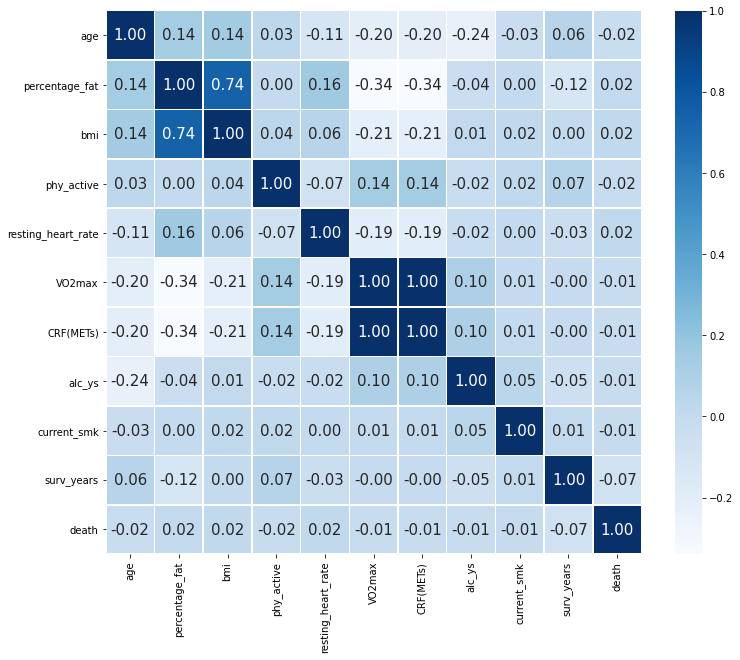

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_selected.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues', annot_kws={'size':15})
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
#### Male
X_train, X_test, y_train, y_test = train_test_split(df_selected.drop(columns=['VO2max']),
                                                    df_selected['VO2max'], random_state=1004,
                                                    test_size=0.2)
print("Train set size = {}".format(len(X_train)))
print("Test set size = {}".format(len(X_test)))

Train set size = 1088
Test set size = 273


In [9]:
X_train.head()

,cdw_no,sm_date,age,percentage_fat,bmi,phy_active,resting_heart_rate,CRF(METs),alc_ys,current_smk,surv_years,death
519,1D2971E5CE17,2015-10-01,52,20.4,21.1,0.0,58.0,7.6,True,0.0,3.712602,False
276,98F8B7B7DA27,2013-08-05,53,34.3,24.1,1.0,60.0,7.8,False,0.0,5.867335,False
907,9E85AE36507F,2014-04-04,52,27.8,20.3,1.0,72.0,8.2,True,0.0,5.204761,False
71,11B5EAD5C4AB,2013-12-17,46,27.1,20.0,0.0,78.0,7.3,True,0.0,5.500455,False
1313,940D33B0169B,2011-05-18,60,29.8,23.6,1.0,56.0,6.0,False,0.0,8.085039,False


#### Age, BMI, Resting_heart_Rate, Phy_Active

In [10]:
column_mask = ['age', 'bmi', 'resting_heart_rate', 'phy_active']
linear_model = LinearRegression(n_jobs=-1)
linear_model.fit(X_train[column_mask], y_train)

## male model results
print(linear_model.coef_)
print(linear_model.intercept_)

get_metric(linear_model, X_train=X_train[column_mask], X_test=X_test[column_mask],
           y_train=y_train, y_test=y_test)

df_selected['ABRP_VO2max'] = linear_model.predict(df_selected[column_mask])
df_selected['ABRP_CRF'] = linear_model.predict(df_selected[column_mask]) / 3.5

[-0.10477118 -0.2060774  -0.08015885  1.41945662]
40.87984171438219
Train set Adjusted R^2: 0.1356406899526882
Train set Multiple Correlation: 0.37258744609159666
Validation set Adjusted R^2: 0.1064969650874924
Validation set Multiple Correlation: 0.34588540819310476
Train set SEE: 2.6753758171648037
Validation set SEE: 2.7935917363062357
MSE Train set score: 7.157635763070239
MSE Validation set score: 7.804180311882987


#### Age, BMI, Phy_Active

In [11]:
column_mask = ['age', 'bmi', 'phy_active']
linear_model = LinearRegression(n_jobs=-1)
linear_model.fit(X_train[column_mask], y_train)

## male model results
print(linear_model.coef_)
print(linear_model.intercept_)

get_metric(linear_model, X_train=X_train[column_mask], X_test=X_test[column_mask],
           y_train=y_train, y_test=y_test)

df_selected['ABP_VO2max'] = linear_model.predict(df_selected[column_mask])
df_selected['ABP_CRF'] = linear_model.predict(df_selected[column_mask]) / 3.5

[-0.09257564 -0.22402168  1.55044038]
35.692451350869774
Train set Adjusted R^2: 0.09694678582080773
Train set Multiple Correlation: 0.31533967875745283
Validation set Adjusted R^2: 0.084238893683384
Validation set Multiple Correlation: 0.3071468704106435
Train set SEE: 2.7358653823720305
Validation set SEE: 2.8333192816154136
MSE Train set score: 7.484959390461657
MSE Validation set score: 8.028435885311533


#### Age, BMI, Resting_heart_Rate

In [12]:
column_mask = ['age', 'bmi', 'resting_heart_rate']
linear_model = LinearRegression(n_jobs=-1)
linear_model.fit(X_train[column_mask], y_train)

## male model results
print(linear_model.coef_)
print(linear_model.intercept_)

get_metric(linear_model, X_train=X_train[column_mask], X_test=X_test[column_mask],
           y_train=y_train, y_test=y_test)

df_selected['ABR_VO2max'] = linear_model.predict(df_selected[column_mask])
df_selected['ABR_CRF'] = linear_model.predict(df_selected[column_mask]) / 3.5

[-0.10423453 -0.20018179 -0.08443707]
41.134717886492545
Train set Adjusted R^2: 0.11359696250162377
Train set Multiple Correlation: 0.34065134232839306
Validation set Adjusted R^2: 0.10272994715065087
Validation set Multiple Correlation: 0.33559843269548445
Train set SEE: 2.7105265814895088
Validation set SEE: 2.8046755928379903
MSE Train set score: 7.346954348961204
MSE Validation set score: 7.866325662252453


#### Age, Percentage_fat, Resting_heart_Rate, Phy_Active

In [13]:
column_mask = ['age', 'percentage_fat', 'resting_heart_rate', 'phy_active']
linear_model = LinearRegression(n_jobs=-1)
linear_model.fit(X_train[column_mask], y_train)

## male model results
print(linear_model.coef_)
print(linear_model.intercept_)

get_metric(linear_model, X_train=X_train[column_mask], X_test=X_test[column_mask],
           y_train=y_train, y_test=y_test)

df_selected['APRP_VO2max'] = linear_model.predict(df_selected[column_mask])
df_selected['APRP_CRF'] = linear_model.predict(df_selected[column_mask]) / 3.5

[-0.094185   -0.15549224 -0.06493259  1.36780851]
39.41438924892806
Train set Adjusted R^2: 0.18529212477969648
Train set Multiple Correlation: 0.43392410608342846
Validation set Adjusted R^2: 0.15042846121779574
Validation set Multiple Correlation: 0.4036361732024693
Train set SEE: 2.597398570882276
Validation set SEE: 2.7240187785541705
MSE Train set score: 6.746479336021292
MSE Validation set score: 7.420466654765689


#### Age, Percentage_fat, Phy_Active

In [14]:
column_mask = ['age', 'percentage_fat', 'phy_active']
linear_model = LinearRegression(n_jobs=-1)
linear_model.fit(X_train[column_mask], y_train)

## male model results
print(linear_model.coef_)
print(linear_model.intercept_)

get_metric(linear_model, X_train=X_train[column_mask], X_test=X_test[column_mask],
           y_train=y_train, y_test=y_test)

df_selected['APP_VO2max'] = linear_model.predict(df_selected[column_mask])
df_selected['APP_CRF'] = linear_model.predict(df_selected[column_mask]) / 3.5

[-0.08309012 -0.17124746  1.46748445]
35.29189396931461
Train set Adjusted R^2: 0.16080889882153204
Train set Multiple Correlation: 0.4038873278747311
Validation set Adjusted R^2: 0.13899508626071433
Validation set Multiple Correlation: 0.3853459017373611
Train set SEE: 2.637354368888525
Validation set SEE: 2.7474144529610194
MSE Train set score: 6.95563806709539
MSE Validation set score: 7.548390840377209


#### Age, Percentage_fat, Resting_heart_Rate

In [15]:
column_mask = ['age', 'percentage_fat', 'resting_heart_rate']
linear_model = LinearRegression(n_jobs=-1)
linear_model.fit(X_train[column_mask], y_train)

## male model results
print(linear_model.coef_)
print(linear_model.intercept_)

get_metric(linear_model, X_train=X_train[column_mask], X_test=X_test[column_mask],
           y_train=y_train, y_test=y_test)

df_selected['APR_VO2max'] = linear_model.predict(df_selected[column_mask])
df_selected['APR_CRF'] = linear_model.predict(df_selected[column_mask]) / 3.5

[-0.09331318 -0.15558965 -0.06891344]
39.76134840337674
Train set Adjusted R^2: 0.1648137978007821
Train set Multiple Correlation: 0.40880168727389177
Validation set Adjusted R^2: 0.14674380244570495
Validation set Multiple Correlation: 0.3951641638475311
Train set SEE: 2.6310536766433734
Validation set SEE: 2.734969918856461
MSE Train set score: 6.922443449378612
MSE Validation set score: 7.480458198713822


In [16]:
df_selected.head()

,cdw_no,sm_date,age,percentage_fat,bmi,phy_active,resting_heart_rate,VO2max,CRF(METs),alc_ys,current_smk,surv_years,death,ABRP_VO2max,ABRP_CRF,ABP_VO2max,ABP_CRF,ABR_VO2max,ABR_CRF,APRP_VO2max,APRP_CRF,APP_VO2max,APP_CRF,APR_VO2max,APR_CRF
0,F1F7E4E13501,2014-04-10,55,30.3,23.9,0.0,70.0,23.45,6.7,True,0.0,5.188334,False,24.581057,7.023159,25.246673,7.213335,24.706879,7.059108,24.977518,7.136434,25.533139,7.295183,25.090817,7.168805
1,FB93B2E3876D,2014-09-02,54,35.6,24.0,1.0,68.0,22.05,6.3,False,0.0,4.791337,False,26.244995,7.498570,26.867287,7.676368,24.959970,7.131420,25.745268,7.355791,26.176102,7.478886,24.497332,6.999238
2,158F02FB30AB,2011-10-10,52,26.2,18.5,0.0,69.0,25.90,7.4,False,0.0,7.688043,False,26.088348,7.453814,26.734117,7.638319,26.185001,7.481429,25.962524,7.417864,26.484524,7.567007,26.077587,7.450739
3,2E159F6A824B,2012-06-29,55,31.4,24.3,0.0,58.0,25.55,7.3,True,0.0,6.967973,False,25.460533,7.274438,25.157064,7.187733,25.640051,7.325729,25.585668,7.310191,25.344767,7.241362,25.746629,7.356180
4,1EB51FE0009F,2012-11-05,58,31.2,24.1,0.0,64.0,28.35,8.1,False,0.0,6.614783,False,24.706482,7.058995,24.924142,7.121183,24.860762,7.103075,24.944616,7.127033,25.129746,7.179928,25.084327,7.166951


In [17]:
df_selected['CRF_tertile'] = pd.qcut(df_selected['CRF(METs)'], q=3, labels=['T1', 'T2', 'T3'])
df_selected['CRF_tertile_nm'] = pd.qcut(df_selected['CRF(METs)'], q=3)

#### BMI
df_selected['ABRP_CRF_tertile'] = pd.qcut(df_selected['ABRP_CRF'], q=3, labels=['T1', 'T2', 'T3'])
df_selected['ABRP_CRF_tertile_nm'] = pd.qcut(df_selected['ABRP_CRF'], q=3)

#### Percentage Fat
df_selected['APRP_CRF_tertile'] = pd.qcut(df_selected['APRP_CRF'], q=3, labels=['T1', 'T2', 'T3'])
df_selected['APRP_CRF_tertile_nm'] = pd.qcut(df_selected['APRP_CRF'], q=3)

In [18]:
print(df_selected['age'].min())
print(df_selected['age'].max())

24
68


In [19]:
def age_split(x):
    if x < 40:
        return 'low'
    elif (x >= 40) & (x < 50):
        return 'middle'
    else: return 'high'

df_selected['age_split'] = df_selected['age'].apply(age_split)

In [20]:
df_selected['CRF_tertile_age_adj'] = df_selected.groupby(['age_split'])['CRF(METs)'].apply(lambda x: pd.qcut(x, q=3, labels=['T1', 'T2', 'T3']))
df_selected['ABRP_CRF_tertile_age_adj'] = df_selected.groupby(['age_split'])['ABRP_CRF'].apply(lambda x: pd.qcut(x, q=3, labels=['T1', 'T2', 'T3']))

df_selected.head()

,cdw_no,sm_date,age,percentage_fat,bmi,phy_active,resting_heart_rate,VO2max,CRF(METs),alc_ys,current_smk,surv_years,death,ABRP_VO2max,ABRP_CRF,ABP_VO2max,ABP_CRF,ABR_VO2max,ABR_CRF,APRP_VO2max,APRP_CRF,APP_VO2max,APP_CRF,APR_VO2max,APR_CRF,CRF_tertile,CRF_tertile_nm,ABRP_CRF_tertile,ABRP_CRF_tertile_nm,APRP_CRF_tertile,APRP_CRF_tertile_nm,age_split,CRF_tertile_age_adj,ABRP_CRF_tertile_age_adj
0,F1F7E4E13501,2014-04-10,55,30.3,23.9,0.0,70.0,23.45,6.7,True,0.0,5.188334,False,24.581057,7.023159,25.246673,7.213335,24.706879,7.059108,24.977518,7.136434,25.533139,7.295183,25.090817,7.168805,T1,"(5.399, 7.0]",T1,"(6.433, 7.311]",T1,"(6.436, 7.28]",high,T1,T1
1,FB93B2E3876D,2014-09-02,54,35.6,24.0,1.0,68.0,22.05,6.3,False,0.0,4.791337,False,26.244995,7.498570,26.867287,7.676368,24.959970,7.131420,25.745268,7.355791,26.176102,7.478886,24.497332,6.999238,T1,"(5.399, 7.0]",T2,"(7.311, 7.56]",T2,"(7.28, 7.593]",high,T1,T2
2,158F02FB30AB,2011-10-10,52,26.2,18.5,0.0,69.0,25.90,7.4,False,0.0,7.688043,False,26.088348,7.453814,26.734117,7.638319,26.185001,7.481429,25.962524,7.417864,26.484524,7.567007,26.077587,7.450739,T2,"(7.0, 7.8]",T2,"(7.311, 7.56]",T2,"(7.28, 7.593]",high,T2,T2
3,2E159F6A824B,2012-06-29,55,31.4,24.3,0.0,58.0,25.55,7.3,True,0.0,6.967973,False,25.460533,7.274438,25.157064,7.187733,25.640051,7.325729,25.585668,7.310191,25.344767,7.241362,25.746629,7.356180,T2,"(7.0, 7.8]",T1,"(6.433, 7.311]",T2,"(7.28, 7.593]",high,T2,T2
4,1EB51FE0009F,2012-11-05,58,31.2,24.1,0.0,64.0,28.35,8.1,False,0.0,6.614783,False,24.706482,7.058995,24.924142,7.121183,24.860762,7.103075,24.944616,7.127033,25.129746,7.179928,25.084327,7.166951,T3,"(7.8, 9.9]",T1,"(6.433, 7.311]",T1,"(6.436, 7.28]",high,T3,T1


In [21]:
print(df_selected['CRF(METs)'].max())
print(df_selected['CRF(METs)'].min())

9.9
5.4


In [22]:
df_selected['CRF_1_METs'] = df_selected['CRF(METs)'].astype(int)
df_selected['ABRP_CRF_1_METs'] = df_selected['ABRP_CRF'].astype(int)

##Change Data type to int
df_selected['alc_ys'] = df_selected['alc_ys'].astype(int)

df_selected.head()

,cdw_no,sm_date,age,percentage_fat,bmi,phy_active,resting_heart_rate,VO2max,CRF(METs),alc_ys,current_smk,surv_years,death,ABRP_VO2max,ABRP_CRF,ABP_VO2max,ABP_CRF,ABR_VO2max,ABR_CRF,APRP_VO2max,APRP_CRF,APP_VO2max,APP_CRF,APR_VO2max,APR_CRF,CRF_tertile,CRF_tertile_nm,ABRP_CRF_tertile,ABRP_CRF_tertile_nm,APRP_CRF_tertile,APRP_CRF_tertile_nm,age_split,CRF_tertile_age_adj,ABRP_CRF_tertile_age_adj,CRF_1_METs,ABRP_CRF_1_METs
0,F1F7E4E13501,2014-04-10,55,30.3,23.9,0.0,70.0,23.45,6.7,1,0.0,5.188334,False,24.581057,7.023159,25.246673,7.213335,24.706879,7.059108,24.977518,7.136434,25.533139,7.295183,25.090817,7.168805,T1,"(5.399, 7.0]",T1,"(6.433, 7.311]",T1,"(6.436, 7.28]",high,T1,T1,6,7
1,FB93B2E3876D,2014-09-02,54,35.6,24.0,1.0,68.0,22.05,6.3,0,0.0,4.791337,False,26.244995,7.498570,26.867287,7.676368,24.959970,7.131420,25.745268,7.355791,26.176102,7.478886,24.497332,6.999238,T1,"(5.399, 7.0]",T2,"(7.311, 7.56]",T2,"(7.28, 7.593]",high,T1,T2,6,7
2,158F02FB30AB,2011-10-10,52,26.2,18.5,0.0,69.0,25.90,7.4,0,0.0,7.688043,False,26.088348,7.453814,26.734117,7.638319,26.185001,7.481429,25.962524,7.417864,26.484524,7.567007,26.077587,7.450739,T2,"(7.0, 7.8]",T2,"(7.311, 7.56]",T2,"(7.28, 7.593]",high,T2,T2,7,7
3,2E159F6A824B,2012-06-29,55,31.4,24.3,0.0,58.0,25.55,7.3,1,0.0,6.967973,False,25.460533,7.274438,25.157064,7.187733,25.640051,7.325729,25.585668,7.310191,25.344767,7.241362,25.746629,7.356180,T2,"(7.0, 7.8]",T1,"(6.433, 7.311]",T2,"(7.28, 7.593]",high,T2,T2,7,7
4,1EB51FE0009F,2012-11-05,58,31.2,24.1,0.0,64.0,28.35,8.1,0,0.0,6.614783,False,24.706482,7.058995,24.924142,7.121183,24.860762,7.103075,24.944616,7.127033,25.129746,7.179928,25.084327,7.166951,T3,"(7.8, 9.9]",T1,"(6.433, 7.311]",T1,"(6.436, 7.28]",high,T3,T1,8,7


In [23]:
df_selected.to_csv(os.path.join(DATA_PATH, 'ACM_dataset_F.csv'), index=False, encoding='utf-8-sig')

In [24]:
display(df_selected['CRF_1_METs'].value_counts())
display(df_selected['ABRP_CRF_1_METs'].value_counts())

display(df_selected['death'].value_counts())

7    620
6    343
8    302
9     62
5     34
Name: CRF_1_METs, dtype: int64

7    1208
6      89
8      64
Name: ABRP_CRF_1_METs, dtype: int64

False    1358
True        3
Name: death, dtype: int64